In [26]:
import matplotlib.pyplot as plt 
import random
import numpy as np
import math

# 1. Create Entities

In [27]:
class Point:
    def __init__(self,x,y,color):
        self.__x=x
        self.__y=y
        self.__color=color
    
    @property
    def color(self):
        return self.__color
    
    @property
    def x(self):
        return self.__x

    @property
    def y(self):
        return self.__y

In [28]:
class Line:
    def __init__(self,a,b):
        self.a = a
        self.b = b

    def under(self,x,y):
        return self.a * x + self.b > y 

    def above(self,x,y):
        return not self.under(x,y)

In [29]:
class Neuron:
    def __init__(self):
        self.wx = random.uniform(-1,1)
        self.wy = random.uniform(-1,1)
        self.b = random.uniform(-1,1)

    def predict(self,x,y):
        return 'blue' if self.wx * x + self.wy * y + self.b < 0 else 'red'

    def train(self, points, lr=0.1):
        for p in points:
            prediction = self.predict(p.x,p.y)
            actual = -1 if prediction == 'blue' else 1
            expected = -1 if p.color == 'blue' else 1
            error = expected - actual
            if error:
                self.wx += error * p.x * lr
                self.wy += error * p.y * lr
                self.b += error * 1 * lr
         

# 2. Create a Dataset

y = ax + b

In [30]:
unghi = random.uniform(-math.pi/2, math.pi/2)
line = Line(math.tan(unghi), random.uniform(-10,10))

In [31]:
def createPoints(n):
    points = []
    for _ in range(n):
        x = random.uniform(-10,10)
        y = random.uniform(-10,10)
        c = 'blue' if line.under(x,y) else 'red'
        points.append(Point(x,y,c))
    return points


In [32]:
points = createPoints(100)

# 3. Trainning

In [33]:
n  = Neuron()

n.train(points)


In [35]:
n.wx, n.wy, n.b

(0.9744813552719334, -0.27699408980577767, -3.875363046647152)

# 4. Results

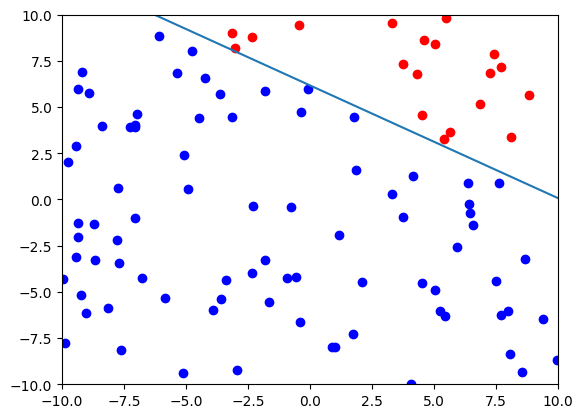

In [34]:
fig, ax = plt.subplots()

blue_x = [p.x for p in points if p.color == 'blue']
blue_y = [p.y for p in points if p.color == 'blue']

red_x = [p.x for p in points if p.color == 'red']
red_y = [p.y for p in points if p.color == 'red']

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

ax.scatter(red_x, red_y, color='red')
ax.scatter(blue_x, blue_y, color='blue')

x = np.linspace(-10,10, 1000)
y = line.a * x + line.b
ax.plot(x, y)